Import all required Libraries

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

Read the csv files using pandas

Read the values.csv file given

In [91]:
heart_disease = pd.read_csv("values.csv")

In [92]:
heart_disease.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


Read the labels.csv file given

In [93]:
labels = pd.read_csv("labels.csv")

In [94]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


Merging the above two datasets for better and easy understanding

In [95]:
heart_disease_prediction = pd.merge(left=heart_disease,right=labels,left_on= "patient_id",right_on="patient_id")
heart_disease_prediction.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


DATA PREPROCESSING

1. Missing values (checking is any null values in merged dataset)

In [96]:
heart_disease_prediction.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

Brief idea on the dataset using describe method

In [97]:
heart_disease_prediction.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [98]:
#Look over the total columns given in the dataset
heart_disease_prediction.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [99]:
heart_disease_prediction.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


2. Verifying the types of variables mentioned and change if required

For future work, here we converted some of the variables like sex,chest_pain_type,resting_ekg_results,exercise_induced_angina from datatype "int64" to "object".
So that it will be helpful for data visualization

In [100]:
heart_disease_prediction.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

Converting the datatypes of below features using 'astype' inbuilt function

In [101]:
columns = {"sex": 'object',"chest_pain_type":'object',"resting_ekg_results":'object',"exercise_induced_angina":'object'}
heart_disease_prediction = heart_disease_prediction.astype(columns)


In [102]:
heart_disease_prediction.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                          object
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                      object
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                      object
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                  object
heart_disease_present                     int64
dtype: object

3. Dropping or Removing unwanted columns like id

In [103]:
heart_disease_prediction = heart_disease_prediction.drop("patient_id",axis=1)

In [104]:
heart_disease_prediction.shape

(180, 14)

4. Replace numerical data with names for dummy encoding done further

Here we try to replace different categorical variables to know the relation between that specific feature and target variable

In [105]:
heart_disease_prediction["sex"].replace({0:"Female",1:"Male"}, inplace=True)
heart_disease_prediction["chest_pain_type"].replace({1:"typical_angina",2:"atypical_angina",3:"non-anginal_pain",4:"asymptotic"}, inplace=True)
heart_disease_prediction["exercise_induced_angina"].replace({0:"False",1:"True"}, inplace=True)

DATA VISUALIZATION

1. Visualize the entire features at once by comparing with all the other variables( i.e., how they are correlated) using Heatmap of seabron library

<AxesSubplot:>

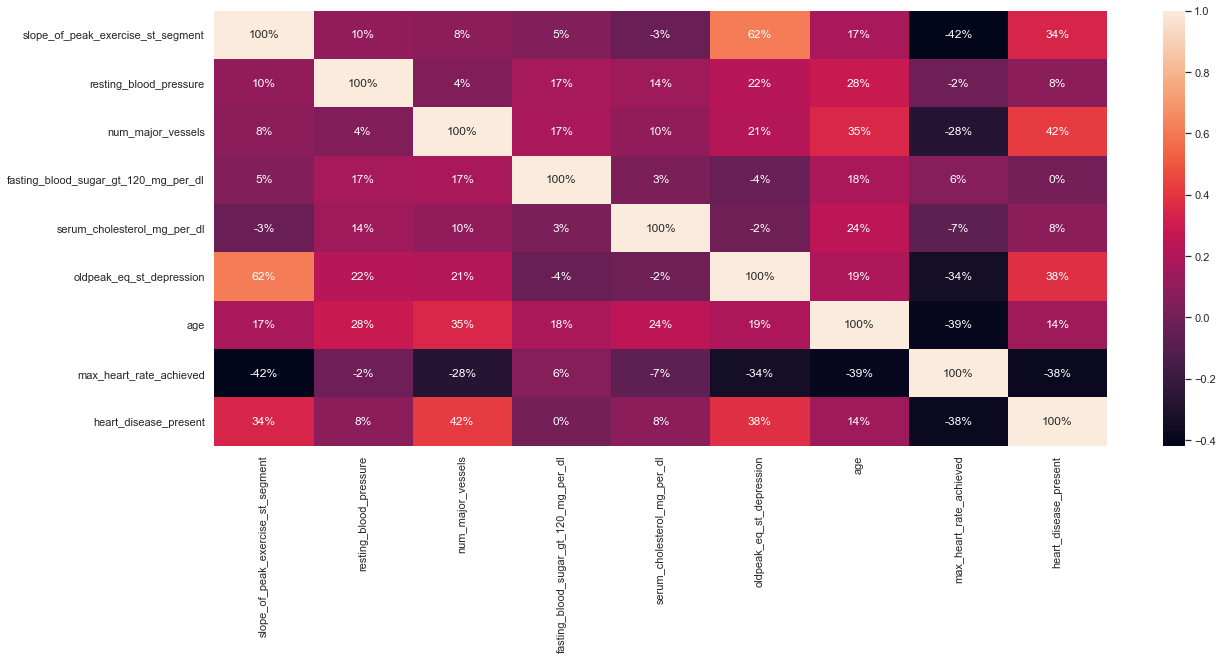

In [106]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(data=heart_disease_prediction.corr(),annot=True,fmt=".0%")

2. Univariate Analysis of most effecting features of the dataset.

Visualizing the number of people with specific age which place an important role for heart disease attack using the function called "valuecounts"

In [107]:
heart_disease_prediction["age"].value_counts()

54    12
58    10
44     9
64     9
51     9
57     8
60     7
62     7
41     6
67     6
65     6
48     6
59     6
55     6
45     5
63     5
52     5
53     4
56     4
49     4
50     4
66     4
42     4
61     3
70     3
68     3
40     3
46     3
71     3
69     2
47     2
35     2
43     2
39     2
74     1
29     1
34     1
38     1
37     1
77     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Distribution of people according to age')

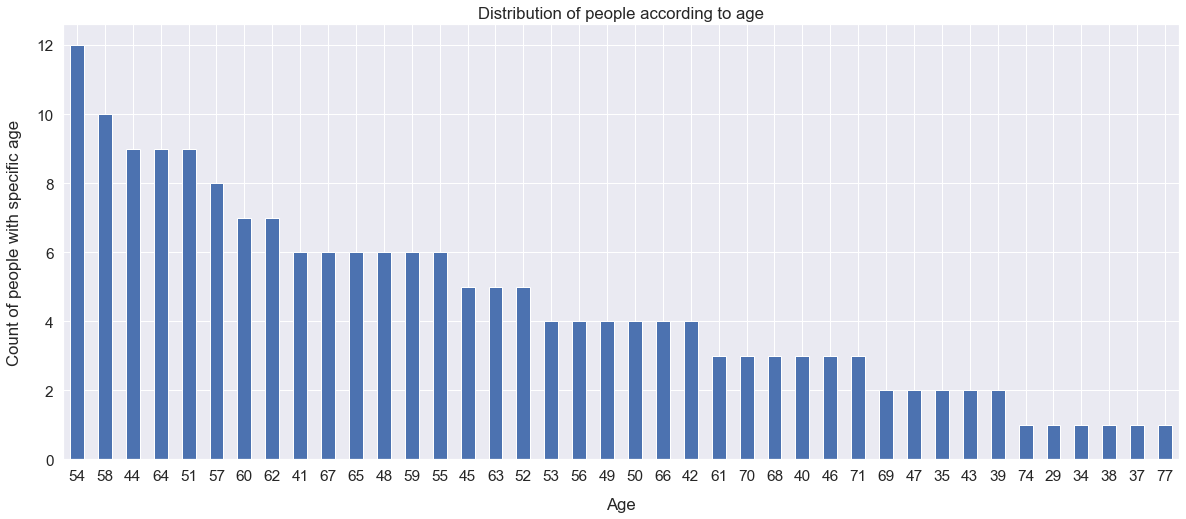

In [108]:
#Plotting the above data using seaborn library
sns.set(font_scale =1.4)
heart_disease_prediction["age"].value_counts().plot(kind="bar",figsize=(20,8),rot=0)
plt.xlabel("Age",labelpad=14)
plt.ylabel("Count of people with specific age",labelpad=14)
plt.title("Distribution of people according to age")

Visualizing the number of people with specific thal type for heart disease attack using the function called "valuecounts"

In [109]:
heart_disease_prediction["thal"].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

Text(0.5, 1.0, 'Distribution of people according to thal condition')

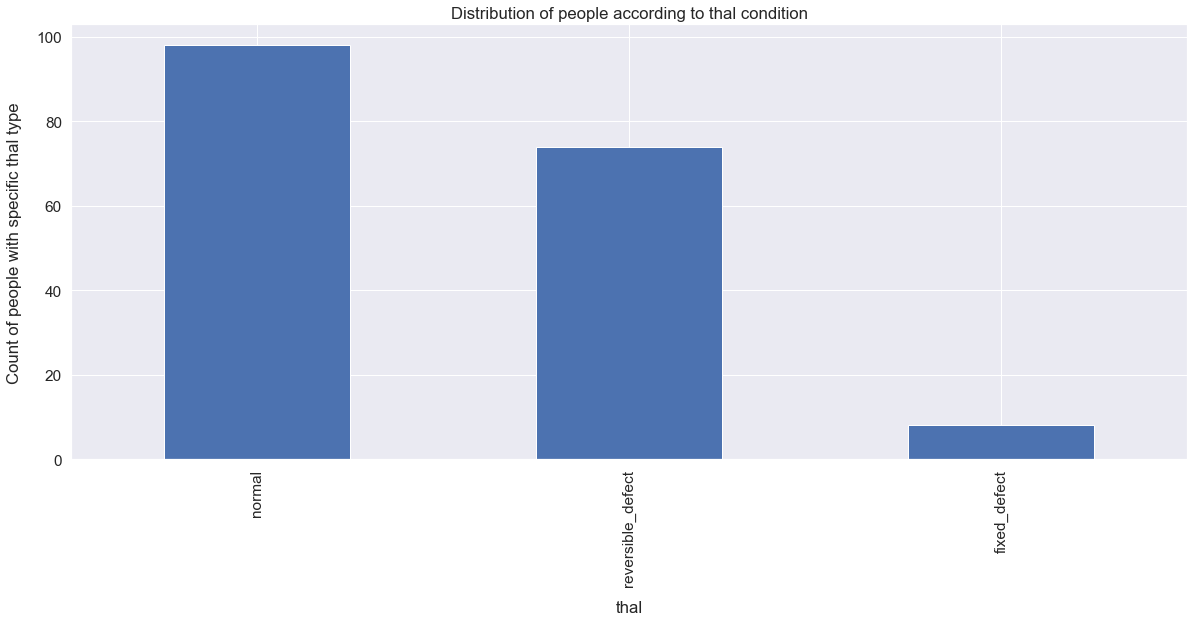

In [110]:
#Plotting the above data using seaborn library
sns.set(font_scale =1.4)
heart_disease_prediction["thal"].value_counts().plot(kind="bar",figsize=(20,8))
plt.xlabel("thal",labelpad=14)
plt.ylabel("Count of people with specific thal type",labelpad=14)
plt.title("Distribution of people according to thal condition")

Visualizing the histogram plot for one of the important feature "resting_blood_pressure" using seaborn visualization library

C:\Users\keerthana\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resting_blood_pressure'>

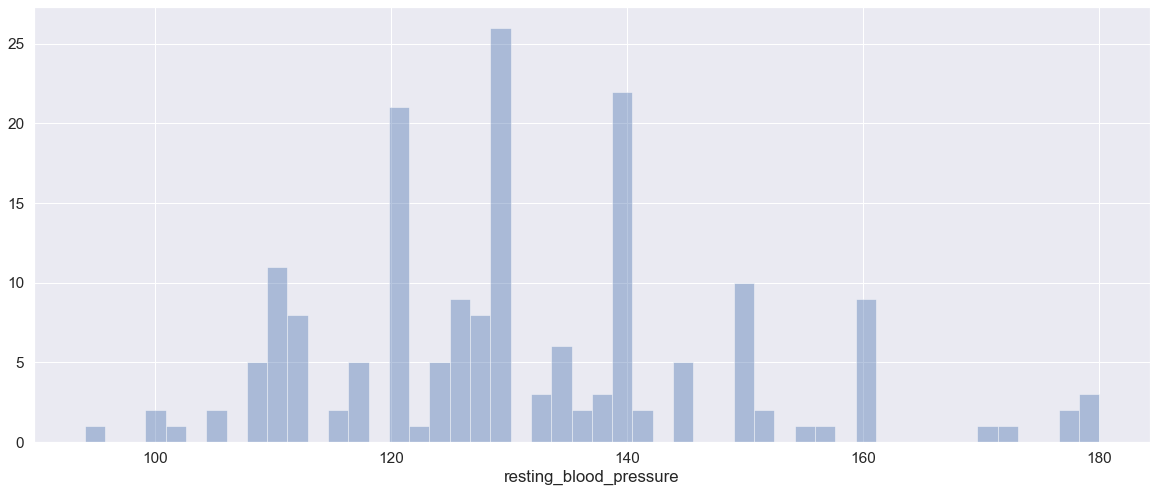

In [111]:
sns.distplot(heart_disease_prediction["resting_blood_pressure"],kde=False, bins=50)

3. Bivariate Analysis of different features to get the relation between particular feature and the target variable("heart_disease_present")

Making a table of two variables (sex and heart_disease_present) to know the number of people with and without heart_disease based on gender.
This gives an insight to know who are most affected by this attack based on gender and we can notice that count of Male with heart_disease is more than Female 

In [112]:
pd.crosstab(heart_disease_prediction["sex"],heart_disease_prediction["heart_disease_present"])

heart_disease_present,0,1
sex,,
Female,45,11
Male,55,69


Making a table between "chest_pain_type" and "heart_disease_present" to know beforehand that what type of chest_pain mostly leads to heart_disease. Below we can see that count of people with "asymptotic" is more with heart_disease_present. 

In [113]:
pd.crosstab(heart_disease_prediction["chest_pain_type"],heart_disease_prediction["heart_disease_present"])

heart_disease_present,0,1
chest_pain_type,,
asymptotic,23,59
atypical_angina,24,4
non-anginal_pain,44,13
typical_angina,9,4


The below plot gives the graph of one variable with reference to another variable (target variable) using seaborn countplot.

Countplot for the variable "resting_blood_pressure" with repect to target variable "heart_disease_present", which means through th ebelow graph we can get the count of people with and without heart_disease based on resting_blood_pressure

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='count'>

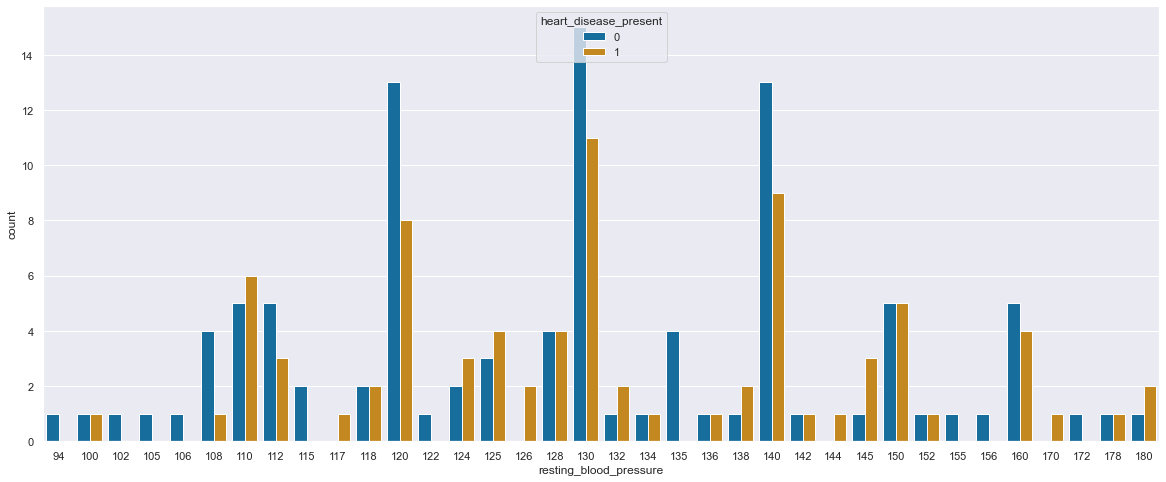

In [114]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x="resting_blood_pressure",hue="heart_disease_present",data=heart_disease_prediction,palette="colorblind")

Countplot for the variable "age" with repect to target variable "heart_disease_present", which means through the below graph we can get the count of people with and without heart_disease based on the different age groups ( i.e., which age people are most affected by this heart_disease)

<AxesSubplot:xlabel='age', ylabel='count'>

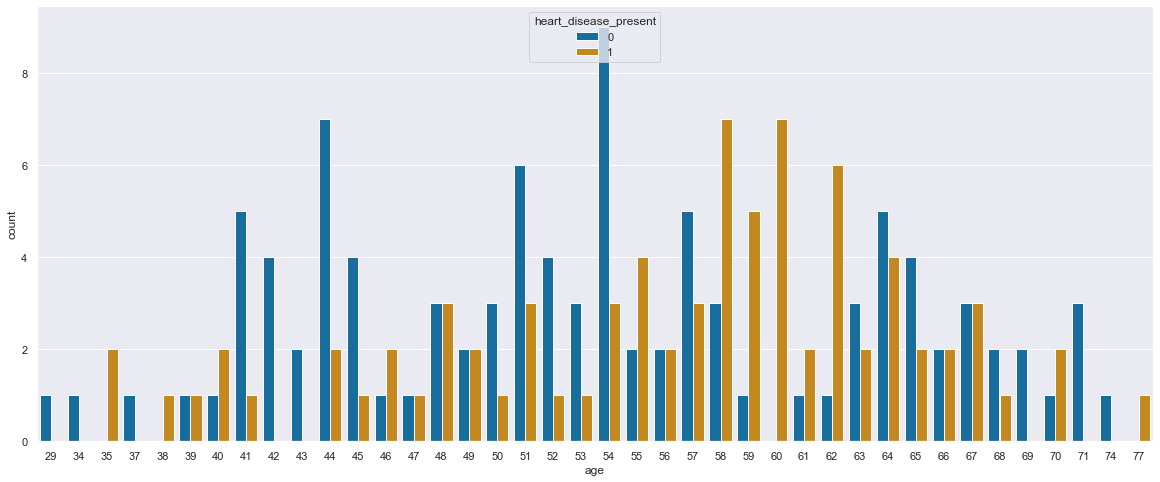

In [115]:
#sns.boxplot(x=heart_disease_prediction["heart_disease_present"],y=heart_disease_prediction["age"])
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x="age",hue="heart_disease_present",data=heart_disease_prediction,palette="colorblind")

Now we compare two continuos variable using correlation and scatter plots

Below code gives the correlation(i.e., how the two features/variables related) between "serum_cholesterol_mg_per_dl" and "age" to know whether the cholesterol level depends upon the age or not.

In [116]:
heart_disease_prediction["serum_cholesterol_mg_per_dl"].corr(heart_disease_prediction["age"])

0.23621061683042893

In the above result we can see positive value which means it has positive correlation. So we can say that as age increases the serum_cholesterol_mg_per_dl also increases.
Now we can observe this using scatter plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl', ylabel='age'>

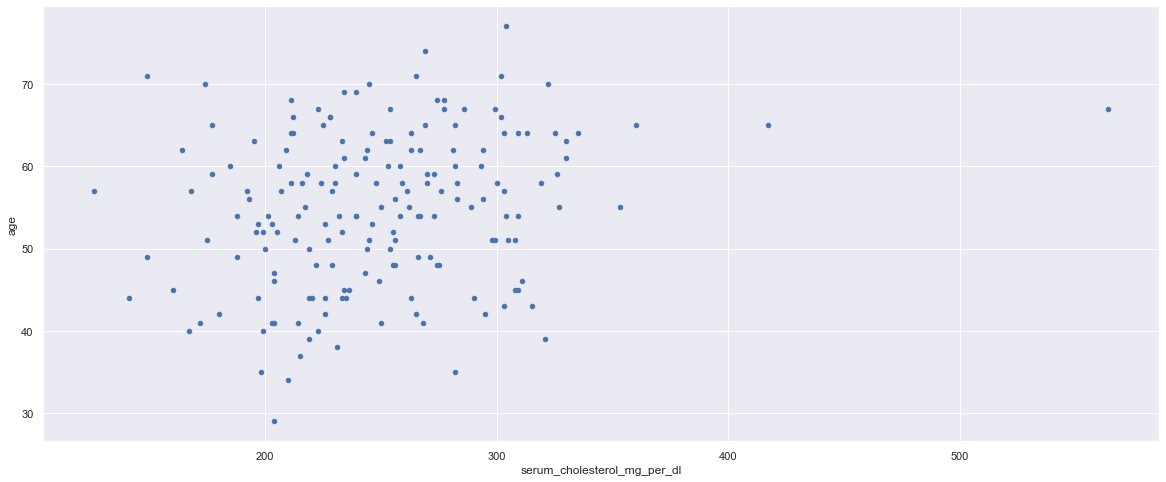

In [117]:
heart_disease_prediction.plot.scatter("serum_cholesterol_mg_per_dl","age")

Below code gives the correlation(i.e., how the two features/variables related) between "max_heart_rate_achieved" and "age" to know whether the heart rate increases or decreases with age, which gives an idea that as the heart rate decreases more chances to heart_disease.

In [118]:
heart_disease_prediction["max_heart_rate_achieved"].corr(heart_disease_prediction["age"])

-0.39463032145539834

In the above result we can see negative value which means it has negative correlation. So we can say that as age increases the max_heart_rate_achieved decreases and more prone to heart_disease.Now we can observe this using scatter plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='age'>

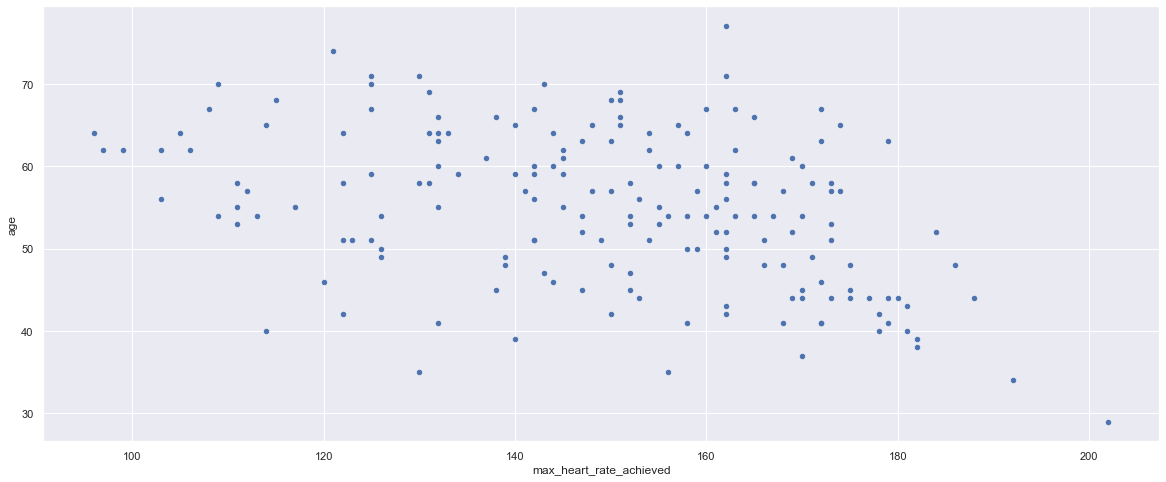

In [119]:
heart_disease_prediction.plot.scatter("max_heart_rate_achieved","age")

DUMMY/ FEATURE ENCODING

Previously we have replaced the numerical values of categorical variable to specific names for better understanding. Now we create new columns using "get_dummies" to get proper intuitions further.

In [120]:
# Dummy Encoding
heart_disease_prediction = pd.get_dummies(data = heart_disease_prediction,columns = ["thal","chest_pain_type","sex","exercise_induced_angina"])
heart_disease_prediction.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,heart_disease_present,...,thal_normal,thal_reversible_defect,chest_pain_type_asymptotic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal_pain,chest_pain_type_typical_angina,sex_Female,sex_Male,exercise_induced_angina_False,exercise_induced_angina_True
0,1,128,0,0,2,308,0.0,45,170,0,...,1,0,0,1,0,0,0,1,1,0
1,2,110,0,0,0,214,1.6,54,158,0,...,1,0,0,0,1,0,1,0,1,0
2,1,125,3,0,2,304,0.0,77,162,1,...,1,0,1,0,0,0,0,1,0,1
3,1,152,0,0,0,223,0.0,40,181,1,...,0,1,1,0,0,0,0,1,1,0
4,3,178,0,0,2,270,4.2,59,145,0,...,0,1,0,0,0,1,0,1,1,0


In [121]:
heart_disease_prediction.shape

(180, 21)

DIVIDING THE TOTAL COLUMNS AS FEATURE VARIABLES AND TARGET VARIABLE

Below code is used to divide the data of all columns except "heart_disease_present" as features and "heart_disease_present" column as target 

In [122]:
features = heart_disease_prediction.drop("heart_disease_present",axis=1)
target = heart_disease_prediction["heart_disease_present"]

SPLITTING THE DATA INTO TRAIN AND TEST 

In [123]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2,random_state=101)

FEATURE SCALING

Below code done the feature scaling using Standardscaler which scales the data such that mean=0 and variance=1

In [124]:
ss = StandardScaler()
features_train = ss.fit_transform(features_train)
features_test = ss.transform(features_test)

MODEL BUILDING

Here we start with some basic models, fit the train data on the models and check the accuracy on the train and test data 

In [125]:
#Random Forest Classifier Model
random_forest = RandomForestClassifier(n_estimators=50,criterion="entropy")
random_forest .fit(features_train,target_train)

#Logistic Regression Model
Logistic_reg = LogisticRegression()
Logistic_reg .fit(features_train,target_train)

#Decision Tree Classifier Model
d_tree= DecisionTreeClassifier(criterion="entropy",max_features=3)
d_tree.fit(features_train,target_train)

#K-Nearest Neighbors Classifier Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train,target_train)

#SVM Model
svm = SVC(C=30,gamma="auto")
svm.fit(features_train,target_train)

SVC(C=30, gamma='auto')

EVALUATION 

Now finding the accuracy score on train and test data for each model

In [126]:
#Random-Forest
print("Random-forest model")
print("train: ",random_forest.score(features_train,target_train))
print("test: ",random_forest.score(features_test,target_test))
#Logistic Regression
print("Logistic Regression model")
print("train: ",Logistic_reg.score(features_train,target_train))
print("test: ",Logistic_reg.score(features_test,target_test))
#Decision-tree
print("Decision-tree model")
print("train: ",d_tree.score(features_train,target_train))
print("test: ",d_tree.score(features_test,target_test))
#KNN
print("K-Nearest-Neighbors model")
print("train: ",knn.score(features_train,target_train))
print("test: ",knn.score(features_test,target_test))
#SVM 
print("Support Vector Machines")
print("train: ",svm.score(features_train,target_train))
print("test: ",svm.score(features_test,target_test))

Random-forest model
train:  1.0
test:  0.8333333333333334
Logistic Regression model
train:  0.8680555555555556
test:  0.8055555555555556
Decision-tree model
train:  1.0
test:  0.6944444444444444
K-Nearest-Neighbors model
train:  0.8402777777777778
test:  0.7777777777777778
Support Vector Machines
train:  1.0
test:  0.7222222222222222


Now for better understanding we build classification_report and confusion_matrix for the above defined models.

In [128]:
#Random-Forest
print("Random-Forest Model")
rf_pred = random_forest.predict(features_test)
rf_cm = confusion_matrix(target_test,rf_pred)
print(rf_cm)
tp, fn, fp, tn = confusion_matrix(target_test,rf_pred,labels=[1,0]).reshape(-1)
rf_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",rf_accuracy)
print(classification_report(target_test,rf_pred))
print("Logistic-Regression Model")
#Logistic-Regression
lr_pred = Logistic_reg.predict(features_test)
lr_cm = confusion_matrix(target_test,rf_pred)
print(lr_cm)
tp, fn, fp, tn = confusion_matrix(target_test,lr_pred,labels=[1,0]).reshape(-1)
lr_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",lr_accuracy)
print(classification_report(target_test,lr_pred))
print("Decision Tree Model")
#Decision Tree Model
dt_pred = d_tree.predict(features_test)
dt_cm = confusion_matrix(target_test,dt_pred)
print(dt_cm)
tp, fn, fp, tn = confusion_matrix(target_test,dt_pred,labels=[1,0]).reshape(-1)
dt_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",dt_accuracy)
print(classification_report(target_test,dt_pred))
print("KNN")
#KNN
knn_pred = knn.predict(features_test)
knn_cm = confusion_matrix(target_test,knn_pred)
print(knn_cm)
tp, fn, fp, tn = confusion_matrix(target_test,knn_pred,labels=[1,0]).reshape(-1)
knn_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",knn_accuracy)
print(classification_report(target_test,knn_pred))
print("SVM")
#SVM
svm_pred = svm.predict(features_test)
svm_cm = confusion_matrix(target_test,svm_pred)
print(svm_cm)
tp, fn, fp, tn = confusion_matrix(target_test,svm_pred,labels=[1,0]).reshape(-1)
svm_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",svm_accuracy)
print(classification_report(target_test,svm_pred))


Random-Forest Model
[[13  1]
 [ 5 17]]
Model accuracy on test data is: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.94      0.77      0.85        22

    accuracy                           0.83        36
   macro avg       0.83      0.85      0.83        36
weighted avg       0.86      0.83      0.84        36

Logistic-Regression Model
[[13  1]
 [ 5 17]]
Model accuracy on test data is: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.94      0.73      0.82        22

    accuracy                           0.81        36
   macro avg       0.81      0.83      0.80        36
weighted avg       0.84      0.81      0.81        36

Decision Tree Model
[[10  4]
 [ 7 15]]
Model accuracy on test data is: 0.6944444444444444
              precision    recall  f1-score   support

           0   

HYPER-PARAMETER TUNING

As we got the highest accuracy of 83.3% on RandomForestClassifier model, we can try for hyper-parametr tuning to increase the accuracy. First method we use is GridSearchCV for random-forest model

1. GridSearchCV

For RandomForestClassifier we do the GridSearchCV using some of the parameters

In [131]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [132]:
#fitting the model and finding best_params and best_score
grid_search.fit(features_train, target_train)
grid_search.best_params_
grid_search.best_score_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


0.8611111111111112

In [133]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

After getting the best_params we fit the RandomForestClassifier with the above parameters and find the accuracy score both on train and test set

In [134]:
rf_model = RandomForestClassifier(bootstrap= True,
 max_depth=100,
 max_features= 3,
 min_samples_leaf=3,
 min_samples_split=12,
 n_estimators= 100)

In [135]:
rf_model.fit(features_train,target_train)
rf_model.score(features_train,target_train)

0.8958333333333334

In [136]:
rf_model.score(features_test,target_test)

0.8333333333333334

Evaluating the random_forest model with parameters from GridSearchCV using confusion_matrix and classification_report

In [142]:
#GridSearchCV
rf_grid_pred = rf_model.predict(features_test)
rf_grid_cm = confusion_matrix(target_test,rf_grid_pred)
print(rf_grid_cm)
tp, fn, fp, tn = confusion_matrix(target_test,rf_grid_pred,labels=[1,0]).reshape(-1)
rf_grid_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",rf_grid_accuracy)
print(classification_report(target_test,rf_grid_pred))

[[12  2]
 [ 4 18]]
Model accuracy on test data is: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.90      0.82      0.86        22

    accuracy                           0.83        36
   macro avg       0.82      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



2. RandomizedSearchCV

Now we perform RandomizedSearchCV for RandomForestClassifier and find the best_params

Initialize the set of parameters which can be iterated

In [137]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [138]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [140]:
rf_random.best_score_

0.8333333333333334

After getting the best_params we fit the RandomForestClassifier with the above parameters and find the accuracy score both on train and test set

In [141]:
rf_rand_model = RandomForestClassifier(n_estimators= 400,
 min_samples_split=10,
 min_samples_leaf= 4,
 max_features="sqrt",
 max_depth= 90,
 bootstrap= True)
rf_rand_model.fit(features_train,target_train)
print(rf_rand_model.score(features_train,target_train))
print(rf_rand_model.score(features_test,target_test))

0.9097222222222222
0.8055555555555556


Evaluating the random_forest model with parameters from RandomizedSearchCV using confusion_matrix and classification_report

In [143]:
#GridSearchCV
rf_rand_pred = rf_rand_model.predict(features_test)
rf_rand_cm = confusion_matrix(target_test,rf_rand_pred)
print(rf_rand_cm)
tp, fn, fp, tn = confusion_matrix(target_test,rf_rand_pred,labels=[1,0]).reshape(-1)
rf_rand_accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Model accuracy on test data is:",rf_rand_accuracy)
print(classification_report(target_test,rf_rand_pred))

[[12  2]
 [ 5 17]]
Model accuracy on test data is: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.89      0.77      0.83        22

    accuracy                           0.81        36
   macro avg       0.80      0.81      0.80        36
weighted avg       0.82      0.81      0.81        36



In [144]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('lr',Logistic_reg),('dt',d_tree),('knn',knn)])
model.fit(features_train,target_train)
model.score(features_train,target_train)

0.9097222222222222

In [146]:
model.score(features_test,target_test)

0.8333333333333334

In [149]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier(base_estimator=Logistic_reg)
Ada_model.fit(features_train, target_train)
Ada_model.score(features_train,target_train),Ada_model.score(features_test,target_test)

(0.8611111111111112, 0.8055555555555556)